In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from scipy.io import arff

In [4]:
data, meta = arff.loadarff('four_dataset.arff')
df = pd.DataFrame(data)

df.describe()
# print(df.isnull().sum())
print(df.columns.tolist())


['Relative_compactness', 'X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']


In [5]:
def remove_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.10)
        q2 = df[col].quantile(0.90)
        iqr = q2 - q1
        lower = q1 - 0.1*iqr
        upper = q2 + 0.1*iqr
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers(df, df.columns)

In [6]:
x = df[['Relative_compactness', 'X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']].values.reshape(-1, 8)
y = df[['Y1', 'Y2']].values.reshape(-1,2)

xs = MinMaxScaler()
ys = MinMaxScaler()

print("Y1 min/max:", y[:, 0].min(), y[:, 0].max())
print("Y2 min/max:", y[:, 1].min(), y[:, 1].max())

x = xs.fit_transform(x)
y = ys.fit_transform(y)
print("Sample y (after scaling):", y[:5])


jb.dump(xs, 'four_x_scaler.pkl')
jb.dump(ys, 'four_y_scaler.pkl')

Y1 min/max: 10.07 40.78
Y2 min/max: 13.2 39.67
Sample y (after scaling): [[0.52784109 0.66830374]
 [0.54835558 0.46845485]
 [0.53077174 0.52247828]
 [0.49495278 0.70003778]
 [0.43829372 0.53305629]]


['four_y_scaler.pkl']

In [7]:
def prob(x1, x2, x3, x4, x5, x6, x7, x8):
    inp = np.array([[x1, x2, x3, x4, x5, x6, x7, x8]], dtype=float)
    xs = jb.load('four_x_scaler.pkl')
    ys = jb.load('four_y_scaler.pkl')
    model_path = 'four.keras'
    inp = xs.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(8, ), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=2)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
        h = model.fit(x, y, epochs=400)
        lv = h.history['loss']
        pred = model.predict(x)

        plt.figure()
        plt.plot(lv)
        plt.title('loss values')
        plt.xlabel('Iterations')
        plt.ylabel('loss')
        plt.grid(True)
        plt.show()

        cols = 3
        rows = (10+1)//2
        plt.figure(figsize = (cols*5, rows*5))
        output_cols = ['DFlow', 'DGap']
        for i in range(2):
            plt.subplot(rows, cols, i+1)
            plt.scatter(y[:, i], pred[:, i], label='actual vs predicted', color='red')
            plt.plot([y[:, i].min(), y[:, i].max()], [y[:, i].min(), y[:, i].max()], 'k--')
            plt.title(output_cols[i])
            plt.xlabel('atual')
            plt.ylabel('predicted')
            plt.grid(True)
            plt.legend()
        
        plt.tight_layout()
        plt.show()
        model.save('four.keras')
    # pred_scaled = model.predict(inp)           # This is in [0–1] range
    # result = ys.inverse_transform(pred_scaled)
    # # Just before returning from prob():
    # print("Scaled prediction:", pred_scaled)
    # print("Unscaled prediction:", result)
    # # Converts back to original Y1, Y2
    # y_pred = model.predict(inp)
    # print("Scaled prediction:", y_pred)
    # print("Expected range: 0 to 1")
    # y_pred = np.clip(y_pred, 0, 1)

    # y_unscaled = ys.inverse_transform(y_pred)
    # print("Unscaled prediction:", y_unscaled)
    # return y_unscaled[0]
    return ys.inverse_transform(model.predict(inp))[0]




Epoch 1/400


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0538
Epoch 2/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 
Epoch 3/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076
Epoch 4/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 
Epoch 5/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 
Epoch 6/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 
Epoch 7/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0078 
Epoch 8/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 
Epoch 9/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047
Epoch 10/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 
Epoch 11/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 
Epoch 12/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 
Epoch 13/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 
Epoch 14/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 
Epoch 15/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 
Epoc

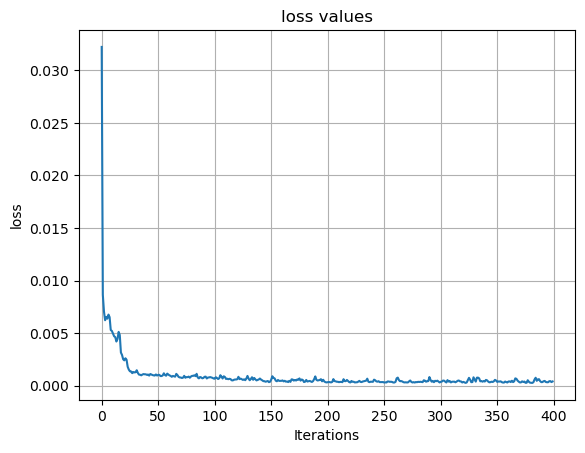

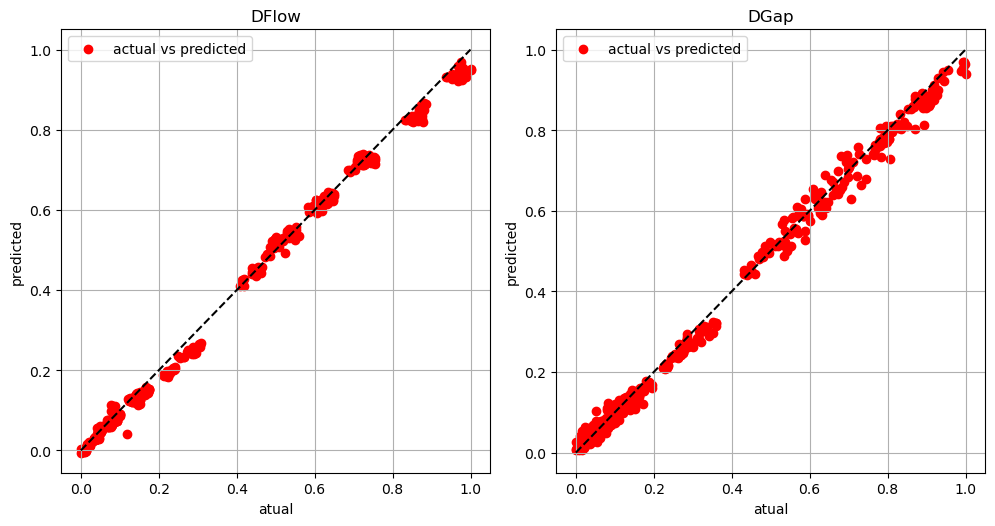

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[35.317734 35.371048]


In [9]:
print(prob(0.79,637,343,147,7,2,0,0))